# CV Screening Model


In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


## Load Dataset

In [19]:

df = pd.read_csv('D:/Projects/CV Screen/ai-model/data/balanced_cv_jd_embeddings.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (5000, 769)


,cv_emb_0,cv_emb_1,cv_emb_2,cv_emb_3,cv_emb_4,cv_emb_5,cv_emb_6,cv_emb_7,cv_emb_8,cv_emb_9,...,jd_emb_375,jd_emb_376,jd_emb_377,jd_emb_378,jd_emb_379,jd_emb_380,jd_emb_381,jd_emb_382,jd_emb_383,hire_decision
0,0.193955,0.786141,0.117683,0.286758,0.386798,0.175350,0.186340,0.564656,0.778225,0.702588,...,0.550709,0.528256,0.205278,0.358278,0.617675,0.094424,0.794915,0.289340,0.813892,1
1,0.561682,0.425593,0.851426,0.968947,0.206067,0.890893,0.452191,0.071144,0.562661,0.978285,...,0.988241,0.348074,0.546170,0.768689,0.101764,0.332768,0.836253,0.066351,0.484615,0
2,0.094513,0.088703,0.807648,0.230816,0.827969,0.758071,0.816038,0.276096,0.307407,0.273901,...,0.784566,0.484519,0.425422,0.736272,0.441085,0.274444,0.165537,0.021072,0.607978,0
3,0.187773,0.378738,0.074597,0.797185,0.654214,0.531336,0.317913,0.067210,0.511666,0.184064,...,0.142154,0.842312,0.696741,0.267095,0.697847,0.496833,0.500484,0.163781,0.919091,1
4,0.497881,0.390516,0.252369,0.649664,0.466274,0.795723,0.891388,0.462092,0.938338,0.119108,...,0.849710,0.345620,0.854116,0.291168,0.270442,0.768704,0.956515,0.899032,0.783634,1


## Basic Statistics and Visualizations

In [20]:

print("Nulls:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())
assert df.isnull().sum().sum() == 0
assert df.duplicated().sum() == 0

Nulls: 0
Duplicates: 0


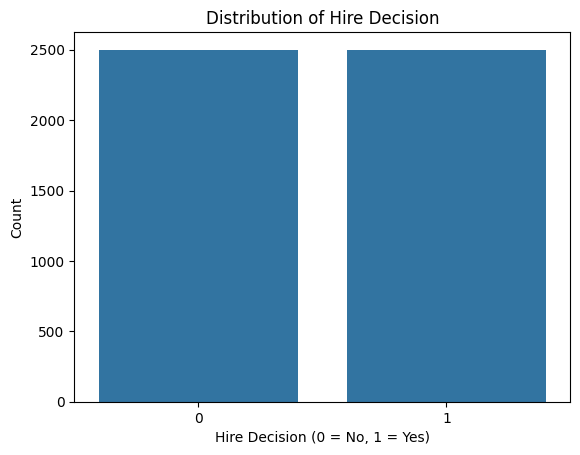

In [21]:
sns.countplot(x="hire_decision", data=df)
plt.title("Distribution of Hire Decision")
plt.xlabel("Hire Decision (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## Train/Test Split

In [22]:

X = df.drop(columns=["hire_decision"])
y = df["hire_decision"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (4000, 768), Test size: (1000, 768)


## Train RandomForest Classifier

In [23]:
model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.842

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       500
           1       0.99      0.69      0.81       500

    accuracy                           0.84      1000
   macro avg       0.88      0.84      0.84      1000
weighted avg       0.88      0.84      0.84      1000



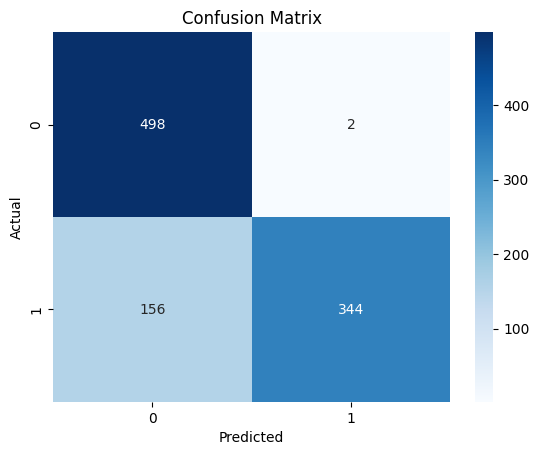

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Save the Trained Model

In [25]:
joblib.dump(model, "D:/Projects/CV Screen/model-server/app/hire_prediction_model.pkl")
print("Model saved as hire_prediction_model.pkl")

Model saved as hire_prediction_model.pkl


## Predict on New Data

In [26]:
data_str = "-0.007293701171875,-0.09965016692876816,-0.014785903505980968,-0.0399322547018528,0.03516034036874771,-0.1313067525625229,-0.032107919454574585,-0.01337834820151329,-0.03685253858566284,0.07383770495653152,0.034591685980558395,-0.06499864906072617,-0.0031745252199470997,-0.012730441987514496,0.0011666271602734923,-0.014142634347081184,0.012992063537240028,-0.08029243350028992,-0.055154215544462204,-0.0071420674212276936,0.06095539778470993,0.007642055861651897,-0.03597332164645195,-0.025288579985499382,0.0903136357665062,0.03525613248348236,-0.04520440846681595,-0.002735779620707035,-0.11789173632860184,-0.04608751833438873,-0.039913009852170944,0.04340720549225807,-0.00048498008982278407,0.04402182623744011,0.07403459399938583,0.027841461822390556,0.00425687013193965,-0.04626605659723282,-0.02432064153254032,-0.0769350454211235,-0.0953996479511261,-0.011683367192745209,0.04801178351044655,0.045577336102724075,-0.006545545533299446,-0.06887602061033249,-0.10849902033805847,-0.1319289654493332,0.034706056118011475,0.034100618213415146,-0.0383053682744503,-0.01057237759232521,-0.007552959956228733,0.06571852415800095,-0.031520944088697433,0.00950165931135416,-0.024961354210972786,0.002199507551267743,0.02685518004000187,0.003524897852912545,0.007025755476206541,0.030931005254387856,0.0114191435277462,0.013036374002695084,-0.06342817097902298,-0.012923994101583958,-0.020141899585723877,-0.022986317053437233,0.07351506501436234,-0.03851408511400223,-0.04812096804380417,0.023113876581192017,-0.0030269131530076265,0.05675048008561134,-0.013359899632632732,-0.003956191707402468,0.046052541583776474,0.03229242563247681,0.12347801774740219,-0.0771535113453865,0.006594768725335598,0.020657913759350777,-0.020324796438217163,0.057146213948726654,-0.06482334434986115,-0.014879859983921051,0.00984940305352211,0.04881605505943298,0.07489506155252457,-0.036008138209581375,-0.04236973822116852,0.018646471202373505,-0.019021494314074516,-0.0016446050722151995,0.04528892785310745,-0.049245137721300125,0.08047596365213394,0.02072373777627945,-0.08623560518026352,0.08726225048303604,0.008235247805714607,-0.011377556249499321,0.03877577558159828,-0.04667547345161438,-0.08137772232294083,0.04640153795480728,0.0324736014008522,0.051568519324064255,0.04826569929718971,-0.09832453727722168,-0.05479636415839195,-0.00867709331214428,-0.030610250309109688,-0.029619822278618813,-0.00499662896618247,0.004460514523088932,-0.07877551764249802,-0.0022508036345243454,0.061034370213747025,0.07098300009965897,0.04673600196838379,0.026905206963419914,0.00743606174364686,-0.06941089779138565,-0.006776447407901287,0.020948635414242744,-0.042186226695775986,1.9300653335134287e-32,0.006328430492430925,-0.02578415721654892,-0.05346420407295227,-0.0052202981896698475,0.03762519359588623,-0.023064738139510155,0.015441826544702053,0.09088381379842758,-0.07547003775835037,-0.02854560688138008,-0.04599497467279434,0.020259199663996696,-0.060787130147218704,0.014425534754991531,0.1407197117805481,-0.099143847823143,-0.05395393446087837,0.0764908492565155,-0.09283294528722763,0.007686831057071686,-0.01729576475918293,-0.10599277913570404,0.019255848601460457,-0.014797303825616837,0.0010796842398121953,-0.009559531696140766,-0.026482468470931053,-0.01489313319325447,0.05114307254552841,0.056562114506959915,-0.018257522955536842,0.009338058531284332,-0.08246223628520966,-0.11135878413915634,-0.02728630043566227,-0.03707633912563324,0.020228341221809387,-0.0932111144065857,0.021955786272883415,-0.010839805006980896,-0.03883891552686691,0.06328638643026352,-0.03233810514211655,-0.04009269177913666,0.0218733549118042,-0.006515396758913994,0.04915410280227661,0.01772640086710453,0.02617015689611435,0.058162298053503036,-0.09548616409301758,-0.06532333791255951,0.04017172381281853,-0.02248498424887657,-0.06411754339933395,0.09877603501081467,0.08457453548908234,0.006500651128590107,0.009588565677404404,0.0002728180552367121,-0.06759099662303925,0.033866576850414276,0.021587500348687172,-0.04869044944643974,0.06406887620687485,-0.010458196513354778,0.07303177565336227,0.03821583464741707,0.06265312433242798,0.0326419398188591,-0.06581605225801468,-0.11179737746715546,0.12269894778728485,0.0329633429646492,0.04811953753232956,-0.03032580390572548,-0.004766023717820644,-0.0010819234885275364,-0.05749286338686943,-0.029341822490096092,-0.0039641172625124454,0.07776141166687012,-0.06485926359891891,-0.10499057918787003,0.011902491562068462,0.03563195839524269,0.04715950787067413,-0.08756838738918304,-0.07922501116991043,0.030968395993113518,0.020435430109500885,-0.01734469272196293,-0.044610414654016495,0.03913651406764984,-0.11063247919082642,-1.794768431659279e-32,-0.01509002409875393,-0.04891139641404152,-0.028164613991975784,0.018302392214536667,0.09050153940916061,-0.04596837982535362,-0.00005701837653759867,-0.010918175801634789,0.002849578857421875,-0.0699482336640358,0.04334806278347969,0.04142628610134125,-0.03678373992443085,0.02029210701584816,0.013149931095540524,0.02069939486682415,-0.028471603989601135,-0.049468692392110825,-0.06248387694358826,0.05718588829040527,-0.026429640129208565,0.10078474134206772,-0.09014521539211273,-0.024154463782906532,0.08416959643363953,0.06607597321271896,0.02367216907441616,0.05899079516530037,0.04063977301120758,-0.011282961815595627,0.03218691796064377,0.07469065487384796,-0.1048930436372757,0.052522119134664536,0.019251463934779167,0.020514337345957756,0.055428680032491684,-0.011714545078575611,-0.06115252152085304,0.038668014109134674,0.15321937203407288,-0.012291175313293934,0.017883388325572014,0.025751177221536636,0.03233436122536659,-0.011588167399168015,-0.01187826506793499,-0.04550899192690849,-0.018286455422639847,-0.003473886987194419,0.02209835685789585,0.018298082053661346,-0.03531618043780327,-0.011548296548426151,0.05821366608142853,0.013857422396540642,-0.011020396836102009,-0.008553129620850086,-0.06971143186092377,-0.1080036386847496,0.07641147077083588,0.0026882283855229616,0.03939123824238777,-0.04062496870756149,0.07378486543893814,0.03151775524020195,0.0392594113945961,0.09041201323270798,-0.06730584055185318,-0.013093014247715473,-0.014295851811766624,0.023414259776473045,-0.03643755614757538,-0.09047843515872955,0.023909812793135643,-0.0008261025650426745,-0.03528842329978943,0.005602800752967596,-0.09092814475297928,-0.01575835794210434,-0.04448908939957619,0.04623540863394737,-0.05114448070526123,0.02927742339670658,0.011773696169257164,-0.05397121235728264,-0.06650330871343613,0.08938423544168472,-0.01923673413693905,-0.05586228147149086,-0.043376147747039795,-0.02007816918194294,0.005063643213361502,0.03156480938196182,-0.004549543838948011,-7.149084524371574e-8,-0.02562418021261692,0.0661492794752121,-0.022348374128341675,-0.0030690052080899477,0.04591023176908493,0.002490079030394554,-0.002340490696951747,0.04564729705452919,-0.020124563947319984,-0.050938237458467484,0.005157378502190113,0.0028979568742215633,-0.02602713741362095,0.007857313379645348,0.06716684252023697,-0.027017131447792053,-0.044546205550432205,0.06271739304065704,-0.0790773332118988,-0.045908648520708084,0.057886071503162384,-0.005176322069019079,-0.048726264387369156,0.008877359330654144,-0.05352995917201042,-0.022629281505942345,0.0639789029955864,0.02918349951505661,0.011030401103198528,0.036789070814847946,-0.011670182459056377,0.01709100417792797,-0.004071470815688372,-0.12935753166675568,0.10458485037088394,-0.006380589213222265,-0.008985181339085102,-0.013998246751725674,0.0679309219121933,0.03389812633395195,-0.02638022042810917,0.047528475522994995,0.018305061385035515,0.012240242213010788,0.04525507614016533,0.01948864758014679,-0.0666944682598114,0.04326504468917847,0.04186121001839638,-0.055681295692920685,-0.07204615324735641,0.004639782011508942,-0.09829821437597275,0.051756106317043304,0.009389721788465977,0.03750135377049446,-0.00022281119890976697,0.019762108102440834,-0.027435170486569405,0.06475954502820969,0.15871353447437286,-0.05281791836023331,0.011496666818857193,0.04166283458471298,-0.049910128116607666,0.00912693701684475,0.053712137043476105,0.040363725274801254,-0.01625688746571541,-0.030358580872416496,0.06217294931411743,0.036157991737127304,-0.07089872658252716,0.008015889674425125,-0.08584615588188171,-0.13091957569122314,0.07753927260637283,-0.01945778913795948,-0.013085886836051941,0.041397228837013245,0.004913169890642166,-0.06344769150018692,0.007486475165933371,-0.08961480855941772,0.02177874930202961,-0.010567370802164078,0.012437345460057259,-0.030207745730876923,0.0008629039512015879,0.0056743985041975975,0.06420564651489258,-0.021496759727597237,-0.040026046335697174,-0.037512145936489105,-0.04743901267647743,0.03180708736181259,0.02999950386583805,0.07548923790454865,0.035318952053785324,0.06283017992973328,0.013018169440329075,-0.07121299207210541,0.06613555550575256,0.00047567285946570337,-0.0192789938300848,-0.03334646672010422,0.032513901591300964,-0.02890959568321705,-0.011624064296483994,-0.07380674034357071,0.02230880968272686,-0.06606437265872955,-0.014797397889196873,0.0013788749929517508,-0.04003320261836052,-0.020027441903948784,-0.00600091740489006,0.05769989639520645,-0.017180491238832474,0.05863545462489128,0.05673748627305031,0.0543656200170517,0.018376827239990234,-0.042158033698797226,0.03287290409207344,0.006723612081259489,0.03254278004169464,-0.017007693648338318,-0.007715955376625061,-0.05073719844222069,-0.044059306383132935,0.04855796694755554,-0.0065278103575110435,-0.05616112798452377,-0.03191087394952774,-0.024550404399633408,-0.08057588338851929,0.017417678609490395,0.029438186436891556,-0.061014965176582336,0.07476580142974854,0.01940837875008583,0.07450500130653381,0.02499230019748211,0.022734923288226128,0.027743255719542503,-0.05761250481009483,0.1002093106508255,-0.11814963817596436,-0.04114648699760437,0.020504305139183998,0.10078751295804977,0.03340524807572365,0.05056712031364441,0.025762714445590973,-0.045896243304014206,-0.009521597065031528,0.035634856671094894,-0.0007595662027597427,-0.03905203193426132,0.06289397180080414,0.019735246896743774,0.018871089443564415,0.01780589669942856,-0.008627699688076973,-0.04266553372144699,-0.011154132895171642,0.01929485984146595,-0.059024687856435776,0.11348626017570496,-0.0171233918517828,0.05653620511293411,0.05454763397574425,-0.00004750807784148492,-0.0696248859167099,0.030333779752254486,-0.11973287910223007,0.008980895392596722,0.023932993412017822,0.0636446475982666,-0.04389481991529465,0.0585472546517849,0.049639742821455,0.035072144120931625,0.026838982477784157,0.046821609139442444,-0.051204241812229156,-0.07562848180532455,0.023612048476934433,-0.03482362627983093,0.01808423176407814,8.364853799965892e-33,0.022045664489269257,0.008757543750107288,-0.024814290925860405,0.019542112946510315,0.0666797086596489,0.02434231899678707,0.05997186899185181,0.1020236611366272,-0.06678088009357452,0.0011700037866830826,-0.07459844648838043,0.0032783597707748413,-0.046337805688381195,0.03111114725470543,-0.016024554148316383,-0.015994014218449593,-0.05231563746929169,0.05854810029268265,-0.020245427265763283,0.06096194311976433,-0.025288129225373268,-0.04424294829368591,-0.058119576424360275,0.045957498252391815,0.03501032292842865,-0.01739949733018875,0.01864481344819069,0.012065516784787178,-0.0007991061429493129,0.023322485387325287,-0.041488319635391235,-0.01535886712372303,-0.0726344883441925,-0.040771204978227615,0.034281130880117416,-0.005288677755743265,-0.06934376806020737,-0.06751226633787155,0.016240345314145088,0.03399832174181938,-0.018550334498286247,0.05758565664291382,-0.00034717671223916113,-0.02646932192146778,0.08701398223638535,-0.0210867952555418,0.08670704811811447,-0.0508803091943264,0.07719816267490387,0.11714131385087967,-0.07794222235679626,-0.03010101243853569,0.10126101225614548,-0.01612788811326027,-0.04789135232567787,0.049123454838991165,0.09171676635742188,-0.05363064631819725,-0.052286937832832336,0.07450641691684723,-0.0983993411064148,-0.0088023841381073,-0.006424774881452322,-0.07250577211380005,0.0347626768052578,-0.07725222408771515,0.015026244334876537,-0.0016134546604007483,0.13176564872264862,-0.007169373333454132,-0.05351249873638153,-0.030007340013980865,0.13045138120651245,0.03946762904524803,-0.07152142375707626,-0.026178961619734764,-0.012148994952440262,-0.020315948873758316,-0.0183944720774889,0.02960655651986599,-0.020061707124114037,0.054894521832466125,0.01697939820587635,-0.08511220663785934,0.03842863813042641,0.07202855497598648,0.017670925706624985,-0.02754981629550457,-0.008126260712742805,0.03850346803665161,0.03851104900240898,-0.051161643117666245,-3.190029360666813e-7,0.008618352934718132,-0.03252916410565376,-9.075296136979989e-33,-0.014775533229112625,-0.05267171934247017,-0.052621930837631226,0.029130343347787857,0.051864754408597946,-0.019704844802618027,0.04071742668747902,0.014902133494615555,-0.028996620327234268,-0.053395722061395645,0.01071028970181942,0.0005823552492074668,-0.020103411749005318,0.034521397203207016,-0.09204648435115814,-0.012492346577346325,-0.02753586880862713,-0.03803565353155136,-0.053294822573661804,0.06492199003696442,0.010467330925166607,0.030689021572470665,-0.07738102227449417,0.011889311484992504,0.03224349766969681,-0.006477397866547108,-0.04183013364672661,0.0011725820368155837,0.07676415145397186,0.007042627781629562,0.03707777336239815,0.04709621146321297,-0.08532702922821045,-0.035631656646728516,0.013904687948524952,-0.09041818976402283,0.043601084500551224,-0.04460235685110092,0.05199060216546059,0.07446067035198212,0.051839735358953476,-0.03252728283405304,0.02292807400226593,-0.053869739174842834,-0.027763843536376953,0.09492788463830948,0.02786915935575962,0.045014187693595886,-0.0392550528049469,-0.03653216361999512,0.043243635445833206,0.04210885986685753,-0.02141348086297512,0.04586169496178627,0.038209859281778336,-0.06988032907247543,-0.03348541259765625,-0.05098449066281319,-0.036821819841861725,-0.04340795427560806,0.03883984684944153,0.052720919251441956,0.13437187671661377,0.03934919461607933,-0.014626379124820232,-0.05090829357504845,-0.024989064782857895,0.06729656457901001,-0.13184663653373718,-0.08479563146829605,-0.07951954007148743,-0.048317812383174896,0.03155338764190674,-0.04248233884572983,-0.04298413172364235,-0.058457691222429276,-0.03881748020648956,-0.09715498983860016,-0.044361796230077744,0.033220306038856506,-0.08746341615915298,0.049958646297454834,-0.07343675941228867,0.016080889850854874,0.000899594509974122,0.097805455327034,-0.03604075312614441,0.012606029398739338,0.018501536920666695,-0.07356005162000656,-0.16104207932949066,0.03344212472438812,-0.0522255003452301,-0.03226134181022644,-0.027568688616156578,-6.874938662804198e-8,-0.03292033448815346,0.022782983258366585,-0.0843922421336174,-0.029937807470560074,-0.04610694944858551,-0.011567446403205395,-0.09706103056669235,0.03063252381980419,0.049212586134672165,0.006896237377077341,-0.017231367528438568,-0.015332672744989395,-0.05368035286664963,0.021844182163476944,0.09570995718240738,0.061159491539001465,0.03369659185409546,0.04857978969812393,0.010082781314849854,-0.04487791657447815,0.05330672860145569,-0.02902294509112835,-0.07967763394117355,0.01972888968884945,-0.01202386524528265,0.022830534726381302,-0.014917433261871338,0.05799731984734535,0.008943194523453712,0.0439484640955925,-0.00915487576276064,-0.0549219585955143,-0.021457673981785774,-0.0504000186920166,0.08387453854084015,-0.03459294140338898,0.04513983801007271,-0.10866428166627884,0.043351851403713226,0.06460302323102951,-0.030749164521694183,0.07503528147935867,0.031340476125478745,0.036072518676519394,-0.020203595981001854,-0.047351427376270294,0.01737154647707939,0.052567388862371445,-0.04962104558944702,0.02183804288506508,-0.021211683750152588,-0.06878254562616348,-0.1178203821182251,0.043037381023168564,0.04138034209609032,0.10067398846149445,-0.010055553168058395,-0.07128113508224487,0.044778525829315186,0.10505014657974243,0.05399370193481445,0.01227499358355999,-0.06254995614290237,-0.004031788092106581"

data = np.fromstring(data_str, sep=",")

data = data.reshape(1, -1)


print(f"shape: {data.shape}")



loaded_model = joblib.load(
    "D:/Projects/CV Screen/model-server/app/hire_prediction_model.pkl"
)


# hire_proba = loaded_model.predict_proba(data)[0]


hire_decision = loaded_model.predict(data)



# print(f"Predicted Probability of Hire: {hire_proba:.2f}")


print(f"Hire Decision (0 = No, 1 = Yes): {hire_decision}")

shape: (1, 768)
Hire Decision (0 = No, 1 = Yes): [1]


c:\Users\ShamalRathnayake\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
